In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss, recall_score, precision_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0    500
1    268
Name: Outcome, dtype: int64
ratio: 1.8656716417910448:1.0


<Axes: >

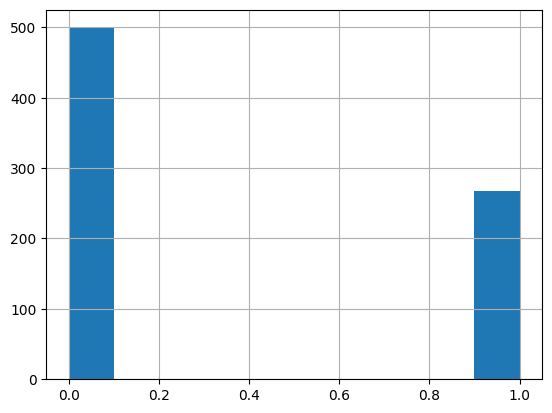

In [ ]:
class_count = data['Outcome'].value_counts()

print(class_count)
print('ratio: ' + str(class_count[0]/class_count[1]) + ':' + str(class_count[1]/class_count[1]))

data['Outcome'].hist()

<Axes: >

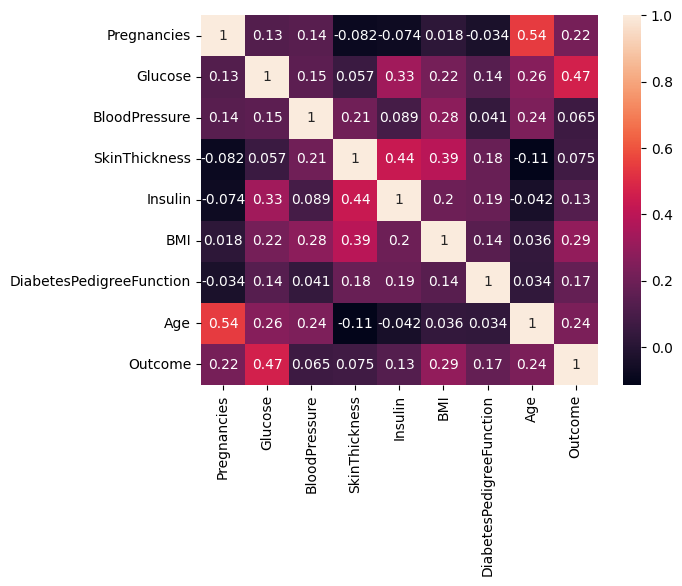

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)

In [ ]:
features = data.drop(columns=['Outcome'])
label = data['Outcome']

In [ ]:
features, label = sm.fit_resample(features, label)

In [ ]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,label,test_size=0.2 )

In [ ]:
def get_model_accuracy(model, X_test, y_test) :
    model_acc = model.score(X_test, y_test)
    return model_acc

def get_model_precision(model, X_test, y_test) :
  model_prec = precision_score(X_test, y_test)
  return model_prec

def get_model_recall(model, X_test, y_test) :
  model_recall = recall_score(X_test, y_test)
  return model_recall

def get_model_f1(model, X_test, y_test) :
  model_f1 = f1_score(X_test, y_test)
  return model_f1

In [ ]:
def plot_confusion_matrix(y_test, y_predict, color, title):
    """
    Confusion matrix to evaluate the accuracy of Models
    """
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color)
    plt.title(title)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)
clf_rf_acc = get_model_accuracy(clf_rf, X_test, y_test)
clf_rf_prec = get_model_precision(clf_rf, y_pred_rf, y_test)
clf_rf_recall = get_model_recall(clf_rf, y_pred_rf, y_test)
clf_rf_f1 = get_model_f1(clf_rf, y_pred_rf, y_test)

print(f'Random Forest Testing Accuracy : {clf_rf_acc:.4}')
print(f'Random Forest Testing Precision : {clf_rf_prec:.4}')
print(f'Random Forest Testing Recall : {clf_rf_recall:.4}')
print(f'Random Forest Testing F1-score : {clf_rf_f1:.4}')



Random Forest Testing Accuracy : 0.815
Random Forest Testing Precision : 0.8155
Random Forest Testing Recall : 0.8235
Random Forest Testing F1-score : 0.8195


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)

y_pred_gb = clf_gb.predict(X_test)
clf_gb_acc = get_model_accuracy(clf_gb, X_test, y_test)
clf_gb_prec = get_model_precision(clf_gb, y_pred_gb, y_test)
clf_gb_recall = get_model_recall(clf_gb, y_pred_gb, y_test)
clf_gb_f1 = get_model_f1(clf_gb, y_pred_gb, y_test)

print(f'Gradient Boost Testing Accuracy : {clf_gb_acc:.4}')
print(f'Gradient Boost Testing Precision : {clf_gb_prec:.4}')
print(f'Gradient Boost Testing Recall : {clf_gb_recall:.4}')
print(f'Gradient Boost Testing F1-score : {clf_gb_f1:.4}')


Gradient Boost Testing Accuracy : 0.805
Gradient Boost Testing Precision : 0.8058
Gradient Boost Testing Recall : 0.8137
Gradient Boost Testing F1-score : 0.8098


In [ ]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)

y_pred_xgb = clf_xgb.predict(X_test)
clf_xgb_acc = get_model_accuracy(clf_xgb, X_test, y_test)
clf_xgb_prec = get_model_precision(clf_xgb, y_pred_xgb, y_test)
clf_xgb_recall = get_model_recall(clf_xgb, y_pred_xgb, y_test)
clf_xgb_f1 = get_model_f1(clf_xgb, y_pred_xgb, y_test)

print(f'XGradient Boost Testing Accuracy : {clf_xgb_acc:.4}')
print(f'XGradient Boost Testing Precision : {clf_xgb_prec:.4}')
print(f'XGradient Boost Testing Recall : {clf_xgb_recall:.4}')
print(f'XGradient Boost Testing F1-score : {clf_xgb_f1:.4}')

XGradient Boost Testing Accuracy : 0.79
XGradient Boost Testing Precision : 0.8252
XGradient Boost Testing Recall : 0.7798
XGradient Boost Testing F1-score : 0.8019


In [ ]:
from sklearn.linear_model import LogisticRegression


clf_lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

clf_lr_acc = get_model_accuracy(clf_lr, X_test, y_test)
clf_lr_prec = get_model_precision(clf_lr, y_pred_lr, y_test)
clf_lr_recall = get_model_recall(clf_lr, y_pred_lr, y_test)
clf_lr_f1 = get_model_f1(clf_lr, y_pred_lr, y_test)

print(f'Logistic Regression Testing Accuracy : {clf_lr_acc:.4}')
print(f'Logistic Regression Testing Precision : {clf_lr_prec:.4}')
print(f'Logistic Regression Testing Recall : {clf_lr_recall:.4}')
print(f'Logistic Regression Testing F1-score : {clf_lr_f1:.4}')


Logistic Regression Testing Accuracy : 0.745
Logistic Regression Testing Precision : 0.7184
Logistic Regression Testing Recall : 0.7708
Logistic Regression Testing F1-score : 0.7437


In [ ]:
from sklearn.ensemble import VotingClassifier

estimators = [('Random Forest', clf_rf),
              ('Gradient Boost', clf_gb),
              ('Xgradient boost', clf_xgb),
              ('Logistic Regression', clf_lr)]
clf_vote = VotingClassifier(estimators, voting='hard')
clf_vote.fit(X_train, y_train)
y_pred_vote = clf_vote.predict(X_test)

clf_vote_acc = get_model_accuracy(clf_vote, X_test, y_test)
clf_vote_prec = get_model_precision(clf_vote, y_pred_vote, y_test)
clf_vote_recall = get_model_recall(clf_vote, y_pred_vote, y_test)
clf_vote_f1 = get_model_f1(clf_vote, y_pred_vote, y_test)

print(f'Ensemble Voting Testing Accuracy : {clf_vote_acc:.4}')
print(f'Ensemble Voting Testing Precision : {clf_vote_prec:.4}')
print(f'Ensemble Voting Testing Recall : {clf_vote_recall:.4}')
print(f'Ensemble Voting Testing F1-score : {clf_vote_f1:.4}')

Ensemble Voting Testing Accuracy : 0.81
Ensemble Voting Testing Precision : 0.7864
Ensemble Voting Testing Recall : 0.8351
Ensemble Voting Testing F1-score : 0.81


Hyperparameter Tuning

Random Forest

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
RF with GridSerchCV Accuracy: 0.81
Random Forest Testing Precision : 0.8155
Random Forest Testing Recall : 0.8155
Random Forest Testing F1-score : 0.8155
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        97
           1       0.82      0.82      0.82       103

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



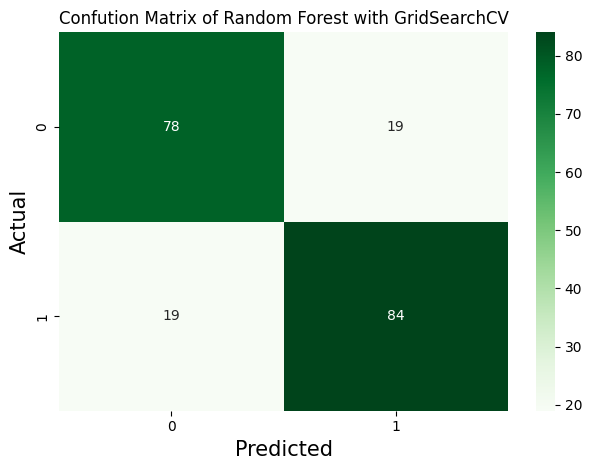

Best Params for Random Forest :  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 400}


In [ ]:
params_rand = {'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']}

grid_search_rf = GridSearchCV(RandomForestClassifier(),
                              param_grid=params_rand,
                              refit=True,
                              verbose=3,
                              scoring="accuracy",
                              n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

grid_predicitons_rf = grid_search_rf.predict(X_test)

grid_search_rf_acc = get_model_accuracy(grid_search_rf, X_test, y_test)
grid_search_rf_prec = get_model_precision(grid_search_rf, grid_predicitons_rf, y_test)
grid_search_rf_recall = get_model_recall(grid_search_rf, grid_predicitons_rf, y_test)
grid_search_rf_f1 = get_model_f1(grid_search_rf, grid_predicitons_rf, y_test)

print(f'RF with GridSerchCV Accuracy: {grid_search_rf_acc:.4}')
print(f'Random Forest Testing Precision : {grid_search_rf_prec:.4}')
print(f'Random Forest Testing Recall : {grid_search_rf_recall:.4}')
print(f'Random Forest Testing F1-score : {grid_search_rf_f1:.4}')
print(classification_report(grid_predicitons_rf, y_test))

title = 'Confution Matrix of Random Forest with GridSearchCV'
plot_confusion_matrix(y_test, grid_predicitons_rf, 'Greens', title)


print("Best Params for Random Forest : ", grid_search_rf.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Gradien Boosting with GridSerchCV Accuracy: 0.8
Gradient Boosting Testing Precision : 0.835
Gradient Boosting Testing Recall : 0.789
Gradient Boosting Testing F1-score : 0.8113
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        91
           1       0.83      0.79      0.81       109

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



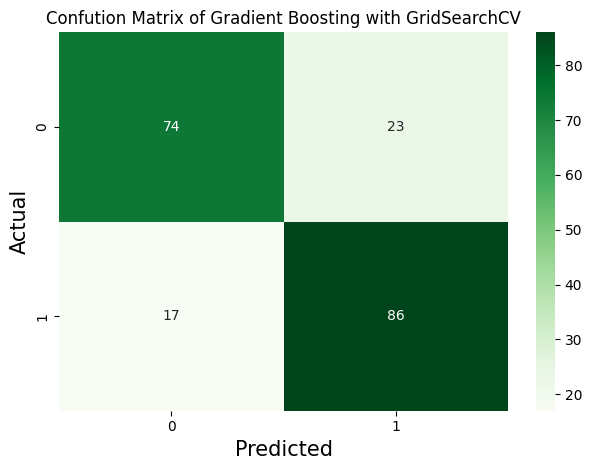

Best Params for Gradient Boosting :  {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
params_rand = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=params_rand, refit=True, verbose=3, scoring="accuracy", n_jobs=-1)

grid_search_gb.fit(X_train, y_train)


grid_predicitons_gb = grid_search_gb.predict(X_test)

grid_search_gb_acc = get_model_accuracy(grid_search_gb, X_test, y_test)
grid_search_gb_prec = get_model_precision(grid_search_gb, grid_predicitons_gb, y_test)
grid_search_gb_recall = get_model_recall(grid_search_gb, grid_predicitons_gb, y_test)
grid_search_gb_f1 = get_model_f1(grid_search_gb, grid_predicitons_gb, y_test)

print(f'Gradien Boosting with GridSerchCV Accuracy: {grid_search_gb_acc:.4}')
print(f'Gradient Boosting Testing Precision : {grid_search_gb_prec:.4}')
print(f'Gradient Boosting Testing Recall : {grid_search_gb_recall:.4}')
print(f'Gradient Boosting Testing F1-score : {grid_search_gb_f1:.4}')
print(classification_report(grid_predicitons_gb, y_test))

title = 'Confution Matrix of Gradient Boosting with GridSearchCV'
plot_confusion_matrix(y_test, grid_predicitons_gb, 'Greens', title)


print("Best Params for Gradient Boosting : ", grid_search_gb.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

XGradient Boosting  with GridSerchCV Accuracy: 0.8
XGradient Boosting Testing Precision : 0.8155
XGradient Boosting Testing Recall : 0.8
XGradient Boosting Testing F1-score : 0.8077
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        95
           1       0.82      0.80      0.81       105

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



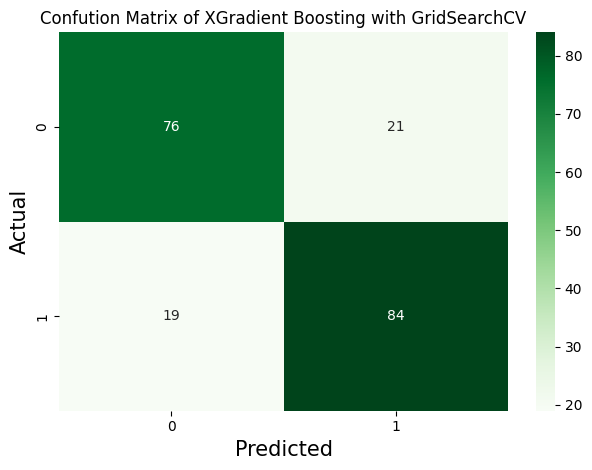

Best Params for XGradient Boosting :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}


In [ ]:
params_rand ={
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000]
}

grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid=params_rand, refit=True, verbose=3, scoring="accuracy", n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)



print()

grid_predicitons_xgb = grid_search_xgb.predict(X_test)

grid_search_xgb_acc = get_model_accuracy(grid_search_xgb, X_test, y_test)
grid_search_xgb_prec = get_model_precision(grid_search_xgb, grid_predicitons_xgb, y_test)
grid_search_xgb_recall = get_model_recall(grid_search_xgb, grid_predicitons_xgb, y_test)
grid_search_xgb_f1 = get_model_f1(grid_search_xgb, grid_predicitons_xgb, y_test)

print(f'XGradient Boosting  with GridSerchCV Accuracy: {grid_search_xgb_acc:.4}')
print(f'XGradient Boosting Testing Precision : {grid_search_xgb_prec:.4}')
print(f'XGradient Boosting Testing Recall : {grid_search_xgb_recall:.4}')
print(f'XGradient Boosting Testing F1-score : {grid_search_xgb_f1:.4}')
print(classification_report(grid_predicitons_xgb, y_test))

title = 'Confution Matrix of XGradient Boosting with GridSearchCV'
plot_confusion_matrix(y_test, grid_predicitons_xgb, 'Greens', title)


print("Best Params for XGradient Boosting : ", grid_search_xgb.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
lr with GridSerchCV Accuracy: 0.77
Logistic Regression Testing Precision : 0.7961
Logistic Regression Testing Recall : 0.7664
Logistic Regression Testing F1-score : 0.781
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        93
           1       0.80      0.77      0.78       107

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



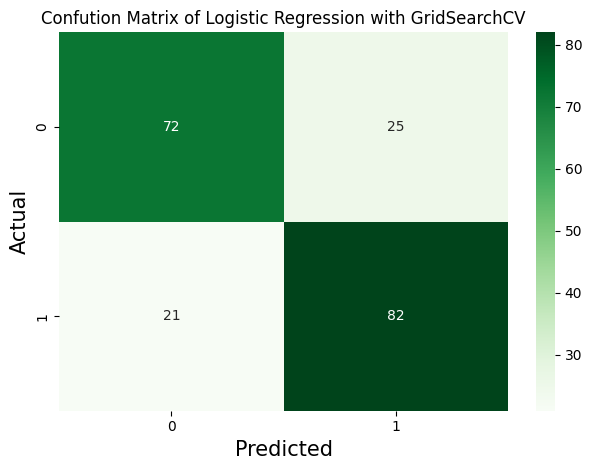

Best Params for Logistic Regression :  {'C': 0.08858667904100823, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
import numpy as np

params_rand = {
    'penalty': ['l2'],
    'C': np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid=params_rand, refit=True, verbose=3, scoring="accuracy", n_jobs=-1)

grid_search_lr.fit(X_train, y_train)
grid_predicitons_lr = grid_search_lr.predict(X_test)

grid_search_lr_acc = get_model_accuracy(grid_search_lr, X_test, y_test)
grid_search_lr_prec = get_model_precision(grid_search_lr, grid_predicitons_lr, y_test)
grid_search_lr_recall = get_model_recall(grid_search_lr, grid_predicitons_lr, y_test)
grid_search_lr_f1 = get_model_f1(grid_search_lr, grid_predicitons_lr, y_test)

print(f'lr with GridSerchCV Accuracy: {grid_search_lr_acc:.4}')
print(f'Logistic Regression Testing Precision : {grid_search_lr_prec:.4}')
print(f'Logistic Regression Testing Recall : {grid_search_lr_recall:.4}')
print(f'Logistic Regression Testing F1-score : {grid_search_lr_f1:.4}')


print(classification_report(grid_predicitons_lr, y_test))

title = 'Confution Matrix of Logistic Regression with GridSearchCV'
plot_confusion_matrix(y_test, grid_predicitons_lr, 'Greens', title)


print("Best Params for Logistic Regression : ", grid_search_lr.best_params_)

In [ ]:
estimators = [('Random Forest', grid_search_rf),
              ('Gradient Boost', grid_search_gb),
              ('Xgradient boost', grid_search_xgb),
              ('Logistic Regression', grid_search_lr)]
clf_vote = VotingClassifier(estimators, voting='hard')
clf_vote.fit(X_train, y_train)
y_pred_vote = clf_vote.predict(X_test)

clf_vote_acc = get_model_accuracy(clf_vote, X_test, y_test)
clf_vote_prec = get_model_precision(clf_vote, y_pred_vote, y_test)
clf_vote_recall = get_model_recall(clf_vote, y_pred_vote, y_test)
clf_vote_f1 = get_model_f1(clf_vote, y_pred_vote, y_test)

print(f'Ensemble Voting Testing Accuracy : {clf_vote_acc:.4}')
print(f'Ensemble Voting Testing Precision : {clf_vote_prec:.4}')
print(f'Ensemble Voting Testing Recall : {clf_vote_recall:.4}')
print(f'Ensemble Voting Testing F1-score : {clf_vote_f1:.4}')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Ensemble Voting Testing Accuracy : 0.81
Ensemble Voting Testing Precision : 0.8058
Ensemble Voting Testing Recall : 0.8218
Ensemble Voting Testing F1-score : 0.8137


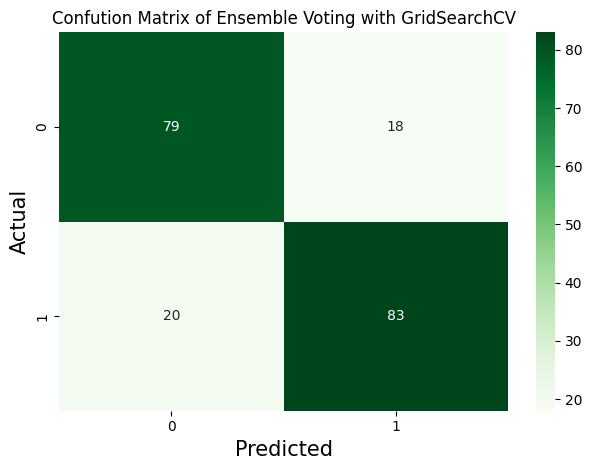

In [ ]:
title = 'Confution Matrix of Ensemble Voting with GridSearchCV'
plot_confusion_matrix(y_test, y_pred_vote, 'Greens', title)